In [44]:
# Import necessary libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Sklearn Libraries
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics

import os
import math

sns.set_style('darkgrid')


In [2]:
# Create reference to directories
source_dir = os.getcwd()
main_dir = os.path.abspath(os.path.join(source_dir, ".."))
data_dir = os.path.abspath(os.path.join(main_dir, "data"))

# Create references to filepaths
train_path = os.path.abspath(os.path.join(data_dir, "train.csv"))
test_path = os.path.abspath(os.path.join(data_dir, "test.csv"))


In [3]:
# Import dataset into pandas dataframe
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)


In [4]:
# Display train and it's size
print(len(train_df))
train_df.head()


1460


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Display test and it's size
print(len(test_df))
test_df.head()


1459


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
# Check for missing values and compare it with the full dataset
train_df.isna().sum().sort_values(ascending=False).head(10) / len(train_df)


PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
dtype: float64

In [7]:
# Features that aren't usable due to the percentage of missing values
remove_features = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu"]
# Drop the features
train_df = train_df.drop(columns=remove_features)
test_df = test_df.drop(columns=remove_features)

In [8]:
# Check for missing values for y value and id
print(train_df[["Id","SalePrice"]].isna().sum())
print(test_df[["Id"]].isna().sum())

Id           0
SalePrice    0
dtype: int64
Id    0
dtype: int64


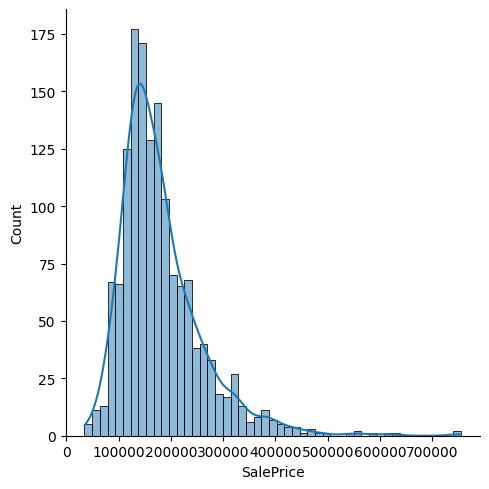

In [9]:
# Look at the distribution of SalePrice
sns.displot(train_df.SalePrice, kde = True)

<AxesSubplot: xlabel='SalePrice'>

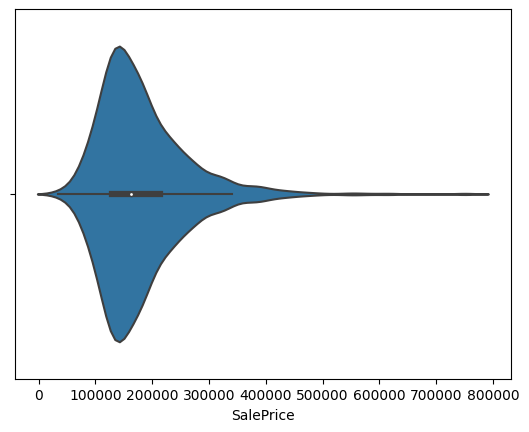

In [10]:
sns.violinplot(data=train_df, x=train_df.SalePrice, orient='h')


Max SalePrice in dataset: 755000
Min SalePrice in dataset: 34900


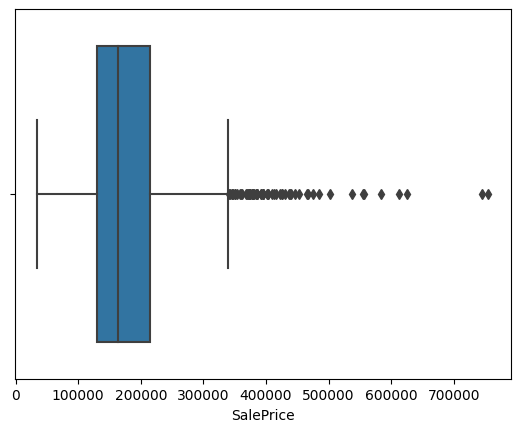

In [11]:
# Look at the boxplot of SalePrice
sns.boxplot(data=train_df,x=train_df['SalePrice'],orient = 'h')

max_saleprice = train_df.SalePrice.max()
min_saleprice = train_df.SalePrice.min()
print("Max SalePrice in dataset: %s" % max_saleprice)
print("Min SalePrice in dataset: %s" % min_saleprice)

# Observations for SalePrices
- Interquartile Range: 120k to 240k
- Outliers: Greater than 350k

- Maximum: 755k
- Minimum: 35k

In [12]:
# Calculate the number of data points that are outside the 1st and 3rd quartiles
third_quant = train_df.SalePrice.quantile(.75)
first_quant = train_df.SalePrice.quantile(.25)

upper_75 = train_df[train_df.SalePrice > third_quant]
lower_25 = train_df[train_df.SalePrice < first_quant]

print("Count of data points in the top 75: %s" % len(upper_75))
print("Count of data points in the low 25: %s" % len(lower_25))


Count of data points in the top 75: 362
Count of data points in the low 25: 365


In [13]:
# Calculate IQR 
iqr = third_quant - first_quant
upper_fence = third_quant + (1.5 * iqr)
lower_fence = first_quant - (1.5 * iqr)

# Calculate fences
upper_fence_df = train_df[train_df.SalePrice > upper_fence]
lower_fence_df = train_df[train_df.SalePrice < lower_fence]

print("Count of data points in the upper fence: %s" % len(upper_fence_df))
print("Count of data points in the lower fence: %s" % len(lower_fence_df))

Count of data points in the upper fence: 61
Count of data points in the lower fence: 0


In [14]:
# Drop data points that lie outside of fence as some algorithms are sensitive to outliers
train_df2 = train_df[train_df.SalePrice < upper_fence]

In [15]:
# Identify numerical and categorical variables
numerics = [np.int16, np.int64, np.float64, np.int32, np.float32, np.float16]
train_df_num = train_df2.select_dtypes(include=numerics)

In [16]:
# Get correlation matrix to identify correlated features to label
train_df_num.corr()["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.784294
GrLivArea        0.661325
GarageCars       0.628013
GarageArea       0.607230
FullBath         0.577369
YearBuilt        0.564558
TotalBsmtSF      0.543508
YearRemodAdd     0.541161
1stFlrSF         0.522785
GarageYrBlt      0.507894
TotRmsAbvGrd     0.472292
Fireplaces       0.453010
MasVnrArea       0.352794
OpenPorchSF      0.325791
LotFrontage      0.319597
2ndFlrSF         0.317358
WoodDeckSF       0.302339
BsmtFinSF1       0.290377
HalfBath         0.278831
LotArea          0.249812
BsmtUnfSF        0.222795
BsmtFullBath     0.202185
BedroomAbvGr     0.201610
ScreenPorch      0.108851
MoSold           0.070478
PoolArea         0.048682
3SsnPorch        0.043324
BsmtFinSF2       0.007154
Id              -0.011984
MiscVal         -0.012872
BsmtHalfBath    -0.018827
YrSold          -0.028245
OverallCond     -0.048005
LowQualFinSF    -0.058086
MSSubClass      -0.060111
EnclosedPorch   -0.144996
KitchenAbvGr    -0.147385
Name: SalePr

# Observations of Correlations
- 78% OverallQual - Rates the overall material and finish of the house
- 66% GrLivArea - Above grade (ground) living area square feet
- 62% GarageCars - Size of garage in car capacity     
- 60% GarageArea - Size of garage in square feet
- 57% FullBath - Full bathrooms above grade
- 56% YearBuilt - Original construction date
- 54% TotalBsmtSF - Total square feet of basement area
- 54% YearRemodAdd - Remodel date (same as construction date if no remodeling or additions)
- 52% 1stFlrSF - First Floor square feet
- 50% GarageYrBlt - Year garage was built

In [17]:
# Features to look at
features = ["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "FullBath", "YearBuilt", "TotalBsmtSF", "YearRemodAdd", "1stFlrSF", "GarageYrBlt"]

In [18]:
train_df2[features].isna().sum().sort_values(ascending=False) / len(train_df)

GarageYrBlt     0.055479
OverallQual     0.000000
GrLivArea       0.000000
GarageCars      0.000000
GarageArea      0.000000
FullBath        0.000000
YearBuilt       0.000000
TotalBsmtSF     0.000000
YearRemodAdd    0.000000
1stFlrSF        0.000000
dtype: float64

Max GarageYrBlt in dataset: 2010.0
Min GarageYrBlt in dataset: 1900.0
Median GarageYrBlt in dataset: 1978.0


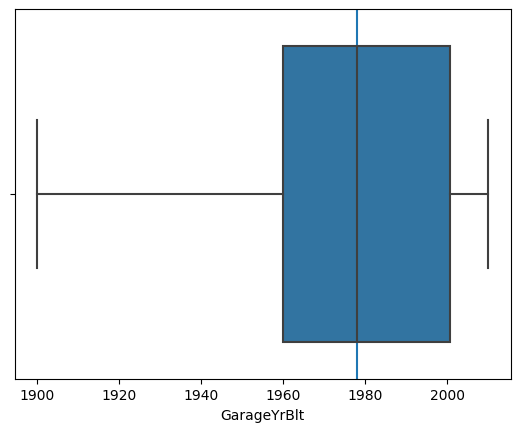

In [19]:
# GarageYrBlt is missing so let's impute the missing values
# But before that let's look at the distribution of GarageYrBlt
# Look at the boxplot of GarageYrBlt
fig, axs = plt.subplots()
sns.boxplot(data=train_df2,x=train_df2.GarageYrBlt,orient = 'h',ax=axs)

max_GarageYrBlt = train_df2.GarageYrBlt.max()
median_GarageYrBlt = train_df2.GarageYrBlt.quantile(.5)
min_GarageYrBlt = train_df2.GarageYrBlt.min()
print("Max GarageYrBlt in dataset: %s" % max_GarageYrBlt)
print("Min GarageYrBlt in dataset: %s" % min_GarageYrBlt)
print("Median GarageYrBlt in dataset: %s" % median_GarageYrBlt)

# Let's look at the median while we are at it.
axs.axvline(median_GarageYrBlt)

# Observation of GarageYrBlt
- Looks like the year of the houses when they were built is skewed left

In [20]:
train_df2.GarageYrBlt.fillna(median_GarageYrBlt, inplace = True)

C:\Users\Johnny\AppData\Local\Temp\ipykernel_14040\1839338093.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df2.GarageYrBlt.fillna(median_GarageYrBlt, inplace = True)


Max GarageYrBlt in dataset: 2010.0
Min GarageYrBlt in dataset: 1900.0
Median GarageYrBlt in dataset: 1978.0


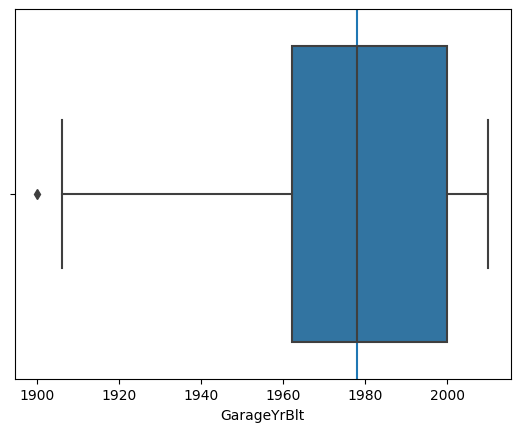

In [21]:
# GarageYrBlt is missing so let's impute the missing values
# But before that let's look at the distribution of GarageYrBlt
# Look at the boxplot of GarageYrBlt
fig, axs = plt.subplots()
sns.boxplot(data=train_df2,x=train_df2.GarageYrBlt,orient = 'h',ax=axs)

max_GarageYrBlt = train_df2.GarageYrBlt.max()
median_GarageYrBlt = train_df2.GarageYrBlt.quantile(.5)
min_GarageYrBlt = train_df2.GarageYrBlt.min()
print("Max GarageYrBlt in dataset: %s" % max_GarageYrBlt)
print("Min GarageYrBlt in dataset: %s" % min_GarageYrBlt)
print("Median GarageYrBlt in dataset: %s" % median_GarageYrBlt)

# Let's look at the median while we are at it.
axs.axvline(median_GarageYrBlt)

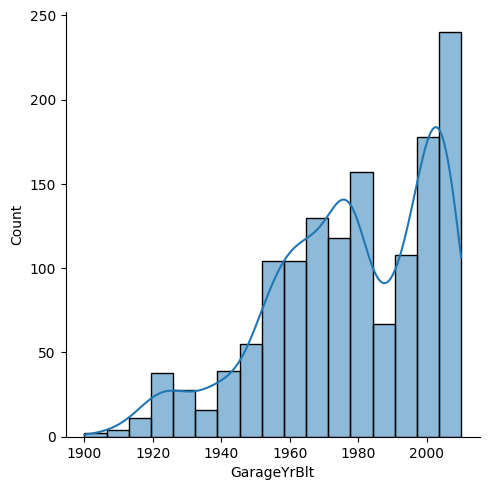

In [22]:
# Look at the distribution of SalePrice
sns.displot(train_df2.GarageYrBlt, kde = True)

In [23]:
# split variables to features and label
X = train_df2[features]
y = train_df2.SalePrice

In [24]:
# OverallQual - Rates the overall material and finish of the house
# GrLivArea - Above grade (ground) living area square feet
# GarageCars - Size of garage in car capacity     
# GarageArea - Size of garage in square feet
# FullBath - Full bathrooms above grade
# YearBuilt - Original construction date
# TotalBsmtSF - Total square feet of basement area
# YearRemodAdd - Remodel date (same as construction date if no remodeling or additions)
# 1stFlrSF - First Floor square feet
# GarageYrBlt - Year garage was built
X

,OverallQual,GrLivArea,GarageCars,GarageArea,FullBath,YearBuilt,TotalBsmtSF,YearRemodAdd,1stFlrSF,GarageYrBlt
0,7,1710,2,548,2,2003,856,2003,856,2003.0
1,6,1262,2,460,2,1976,1262,1976,1262,1976.0
2,7,1786,2,608,2,2001,920,2002,920,2001.0
3,7,1717,3,642,1,1915,756,1970,961,1998.0
4,8,2198,3,836,2,2000,1145,2000,1145,2000.0
...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,460,2,1999,953,2000,953,1999.0
1456,6,2073,2,500,2,1978,1542,1988,2073,1978.0
1457,7,2340,1,252,2,1941,1152,2006,1188,1941.0
1458,5,1078,1,240,1,1950,1078,1996,1078,1950.0


In [29]:
# Train and test split
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=.3,random_state=0)

In [30]:
# Intialize scaler
scaler = preprocessing.StandardScaler().fit(X_train)

In [31]:
# Scale data
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [34]:
regr = linear_model.ElasticNet(random_state=0)

regr.fit(X_train_scaled, y_train)

ElasticNet(random_state=0)

In [35]:
print(regr.coef_)
print(regr.intercept_)

[12721.64174118 11436.60799957  6194.06488688  4697.24835902
  4588.2881417   5999.60671003  4345.03136556  5779.48087175
  4185.54976635  1263.8690321 ]
168483.56690500514


In [36]:
y_val_pred = regr.predict(X_val_scaled)

In [41]:
math.sqrt(metrics.mean_squared_error(y_val, y_val_pred))

31490.255805294593

In [50]:
X_val['SalePrice'] = y_val
X_val['PredSalePrice'] = y_val_pred

C:\Users\Johnny\AppData\Local\Temp\ipykernel_14040\3793157664.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.scatter(range(len(X_val.SalePrice[:20])), X_val.SalePrice[:20], color='blue')
C:\Users\Johnny\AppData\Local\Temp\ipykernel_14040\3793157664.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.scatter(range(len(X_val.PredSalePrice[:20])), X_val.PredSalePrice[:20], color='red')


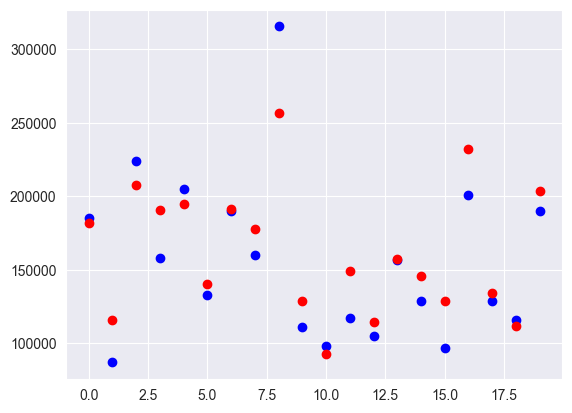

In [89]:
plt.scatter(range(len(X_val.SalePrice[:20])), X_val.SalePrice[:20], color='blue')
plt.scatter(range(len(X_val.PredSalePrice[:20])), X_val.PredSalePrice[:20], color='red')

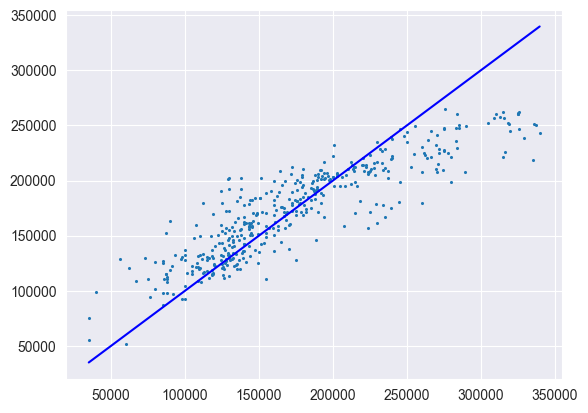

In [98]:
fig, axs = plt.subplots()

axs.scatter(X_val.SalePrice, X_val.PredSalePrice,s=1.5)
p1 = max(max(X_val.PredSalePrice), max(X_val.SalePrice))
p2 = min(min(X_val.PredSalePrice), min(X_val.SalePrice))
plt.plot([p1, p2], [p1, p2], 'b-')